In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Any results you write to the current directory are saved as output.

In [56]:
train = pd.read_csv('/home/arpit/Desktop/datasets/titanic/titanic_data.csv')
test = pd.read_csv('/home/arpit/Desktop/datasets/titanic/test.csv')


In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
print(train.describe())
print('---------------------------------')
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
---------------------------------
       PassengerId      Pclass         Age     

In [59]:
# Drop unnecessary columns
train = train.drop(['Name','Ticket','PassengerId'],axis=1)
test = test.drop(['Name','Ticket'],axis=1)

In [60]:
train['Age']=train['Age'].fillna(np.mean(train['Age']))

In [61]:
test['Age'] = test['Age'].fillna(np.mean(test["Age"]))

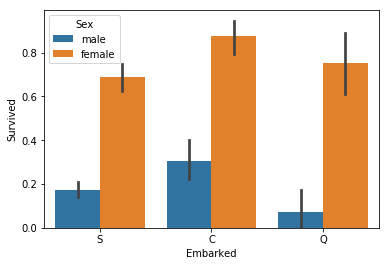

In [62]:
sns.barplot(train.Embarked,train.Survived,hue=train.Sex)

In [63]:
# age_group = (0,10,25,40,60,80,100)
# group_name = ('baby','teen',' young adult','adult','Senior','Super S')
# cat = pd.cut(train.Age,age_group,labels = group_name)
# train.Age = cat
# test.Age = pd.cut(test.Age,age_group,labels=group_name)

In [64]:
# sns.barplot(train.Age,train.Survived,hue = train.Sex)

In [65]:
train.Cabin=train.Cabin.fillna('N')
train.Cabin = train.Cabin.apply(lambda x:x[0])
test.Cabin=train.Cabin.fillna('N')
test.Cabin = test.Cabin.apply(lambda x:x[0])

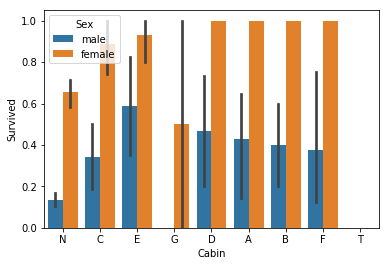

In [66]:
sns.barplot(train.Cabin,train.Survived,hue=train.Sex)

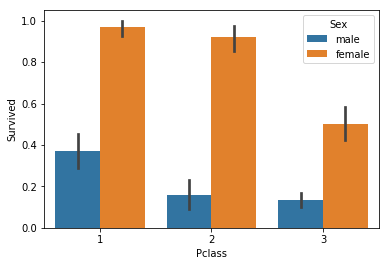

In [67]:
sns.barplot(train.Pclass,train.Survived,hue=train.Sex)

In [68]:

train = train.drop(['Fare'],axis=1)
test = test.drop(['Fare'],axis=1)

In [69]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [70]:
yy = test.PassengerId
test = test.drop(['PassengerId'],axis=1)

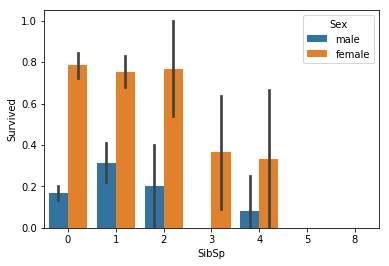

In [71]:
sns.barplot(train.SibSp,train.Survived,hue=train.Sex)

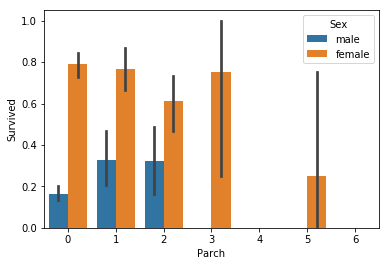

In [72]:
sns.barplot(train.Parch,train.Survived,hue=train.Sex)

In [73]:
train = pd.concat([train,pd.get_dummies(train.Embarked,prefix = 'Embarked')],axis=1)
test = pd.concat([test,pd.get_dummies(test.Embarked,prefix = 'Embarked')],axis=1)
train.head()

    

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,N,S,0,0,1
1,1,1,female,38.0,1,0,C,C,1,0,0
2,1,3,female,26.0,0,0,N,S,0,0,1
3,1,1,female,35.0,1,0,C,S,0,0,1
4,0,3,male,35.0,0,0,N,S,0,0,1


In [74]:


test.head()


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,N,Q,0,1,0
1,3,female,47.0,1,0,C,S,0,0,1
2,2,male,62.0,0,0,N,Q,0,1,0
3,3,male,27.0,0,0,C,S,0,0,1
4,3,female,22.0,1,1,N,S,0,0,1


In [75]:
# train = pd.concat([train,pd.get_dummies(train.Pclass,prefix = 'Pclass')],axis=1)
# test = pd.concat([test,pd.get_dummies(test.Pclass,prefix = 'Pclass')],axis=1)
# train.head()

In [76]:
train = pd.concat([train,pd.get_dummies(train['Sex'],prefix='Sex')],axis=1)

In [79]:
test = pd.concat([test,pd.get_dummies(test['Sex'],prefix='Sex')],axis=1)

In [81]:
train = train.drop(['Sex'],axis=1)

train.head()

ValueError: labels ['Sex'] not contained in axis

In [82]:
test = test.drop(['Sex'],axis=1)

In [83]:
Cabin = pd.get_dummies(train['Cabin'], prefix='Cabin')
train = pd.concat([train,Cabin],axis=1)
train.head()


,Survived,Pclass,Age,SibSp,Parch,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,...,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,0,3,22.0,1,0,N,S,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,C,C,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,N,S,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,35.0,1,0,C,S,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,N,S,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [84]:
Cabin = pd.get_dummies(test['Cabin'], prefix='Cabin')
test = pd.concat([test,Cabin],axis=1)
test.head()

,Pclass,Age,SibSp,Parch,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,3,34.5,0,0,N,Q,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,3,47.0,1,0,C,S,0,0,1,1,0,0,0,1,0,0,0,0,0,0
2,2,62.0,0,0,N,Q,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,3,27.0,0,0,C,S,0,0,1,0,1,0,0,1,0,0,0,0,0,0
4,3,22.0,1,1,N,S,0,0,1,1,0,0,0,0,0,0,0,0,1,0


In [85]:

train = train.drop(['Pclass','Embarked','Cabin'],axis=1)
test = test.drop(['Pclass','Embarked','Cabin'],axis=1)

In [86]:
train.head()

,Survived,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,0,22.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,1,38.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3,1,35.0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [88]:
X = train.drop(['Survived'],axis=1)
y = train['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [126]:
clf = RandomForestClassifier(n_estimators=1)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.863563402889
0.75


In [127]:
t = clf.predict(test)

In [128]:
sol = pd.DataFrame({'PassengerId':pd.Series(yy),'Survived':pd.Series(t)},)


In [129]:
sol.to_csv('hard.csv',index=False)

In [132]:
from sklearn.grid_search import GridSearchCV

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [137]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score,make_scorer

In [140]:
parameters = {
    'n_estimators':[1,10,20,100,200],
    'max_depth':list(range(1,20))
}

In [141]:
gr = GridSearchCV(clf,param_grid = parameters,scoring = make_scorer(accuracy_score))
gr.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 10, 20, 100, 200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [142]:
print(gr.best_score_)
print(gr.best_params_)

0.8057784911717496
{'n_estimators': 10, 'max_depth': 6}


In [144]:
forest = gr.best_estimator_
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.837881219904
0.84328358209


In [162]:
t = forest.predict(test)
sol = pd.DataFrame({'PassengerId':pd.Series(yy),'Survived':pd.Series(t)})
sol.to_csv('hardrfor.csv',index=False)

In [163]:
def Kfolding(clf):
    kf = KFold(891,n_folds=10)
    score = []
    for i,j in kf:
        X_train,X_test = X.values[i],X.values[j]
        y_train,y_test = y.values[i],y.values[j]
        clf.fit(X_train,y_train)
        score.append(clf.score(X_test,y_test))
    print(np.mean(score))

Kfolding(forest) 

0.811485642946


In [191]:
print(list(np.linspace(0.001,100,10))+[1000])

[0.001, 11.111999999999998, 22.222999999999999, 33.333999999999996, 44.444999999999993, 55.55599999999999, 66.667000000000002, 77.777999999999992, 88.888999999999996, 100.0, 1000]


In [198]:
from sklearn.svm import SVC
sv = SVC()
parameters={'C':list(np.linspace(0.001,100,10))+[1000],'gamma':[0.001,.01,.1,1.10]}

In [199]:
gr = GridSearchCV(sv,param_grid = parameters,scoring = make_scorer(accuracy_score))
gr.fit(X_train,y_train)
print(gr.best_estimator_)
print(gr.best_score_)
print(gr.best_params_)

SVC(C=33.333999999999996, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.7961476725521669
{'C': 33.333999999999996, 'gamma': 0.01}


In [200]:
sv = gr.best_estimator_
print(sv.score(X_train,y_train))
print(sv.score(X_test,y_test))

0.833065810594
0.850746268657


In [201]:
Kfolding(sv)

0.823782771536


In [202]:
t = gr.best_estimator_.predict(test)
sol = pd.DataFrame({'PassengerId':pd.Series(yy),'Survived':pd.Series(t)})
sol.to_csv('hardsvc.csv',index=False)